<a href="https://colab.research.google.com/github/alwinrioo/DISEASE/blob/main/DISEASE%20DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cardio_train.csv to cardio_train (2).csv


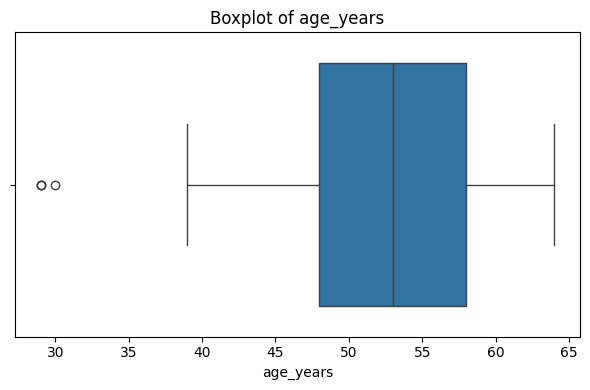

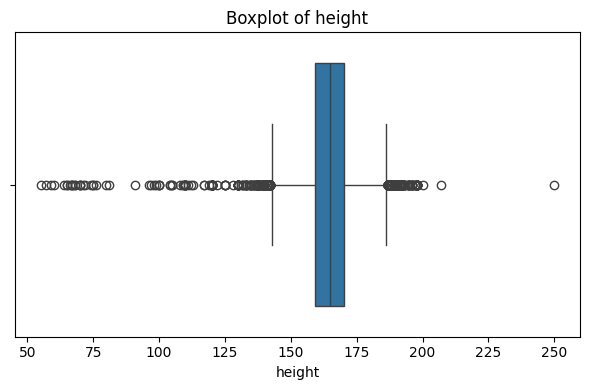

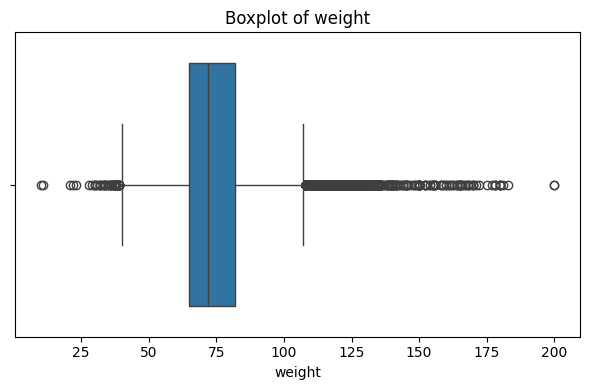

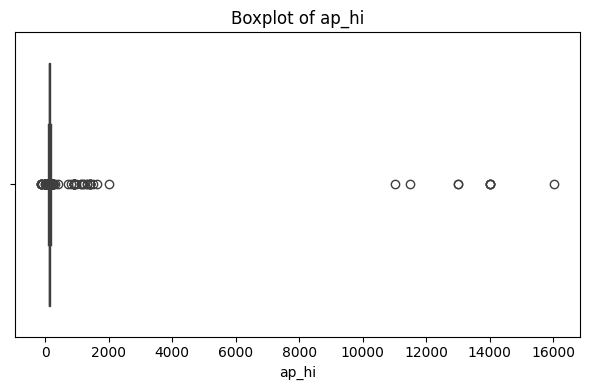

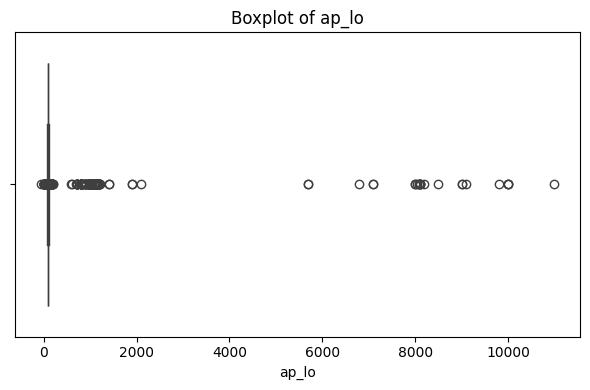

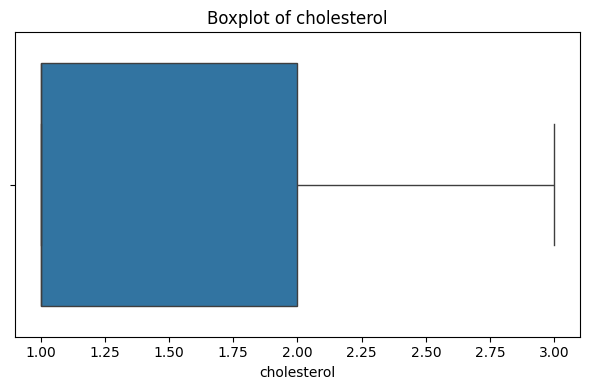

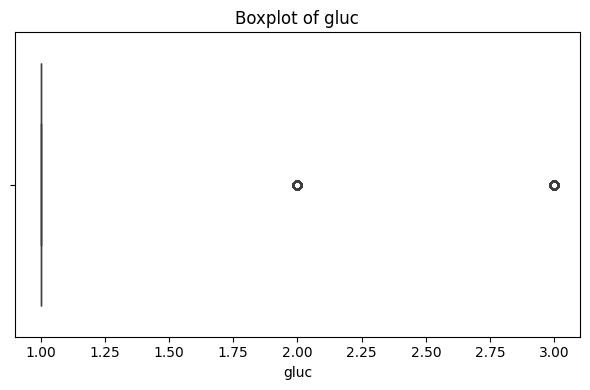

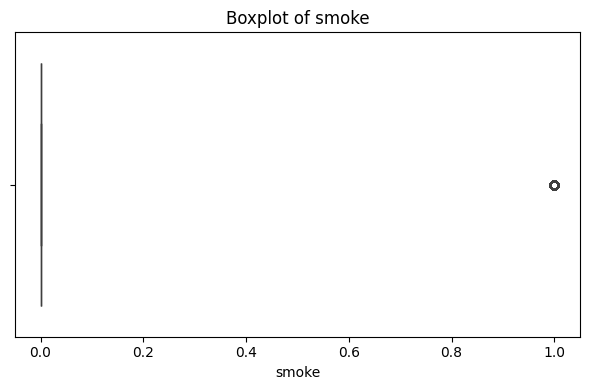

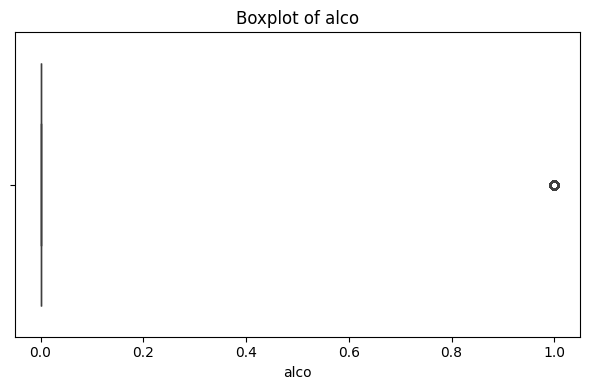

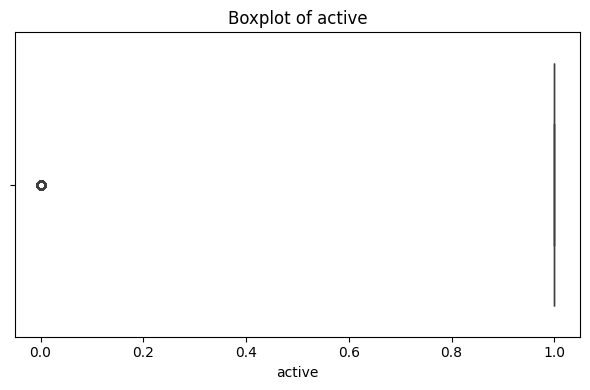

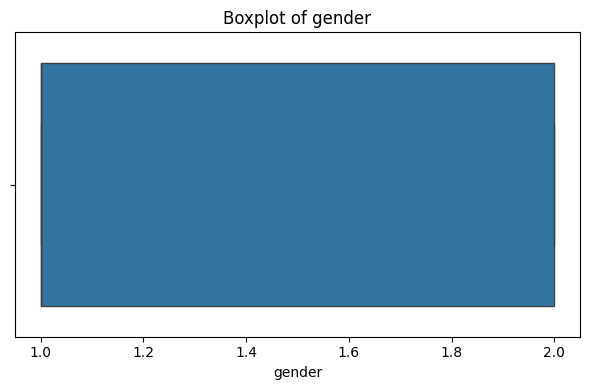

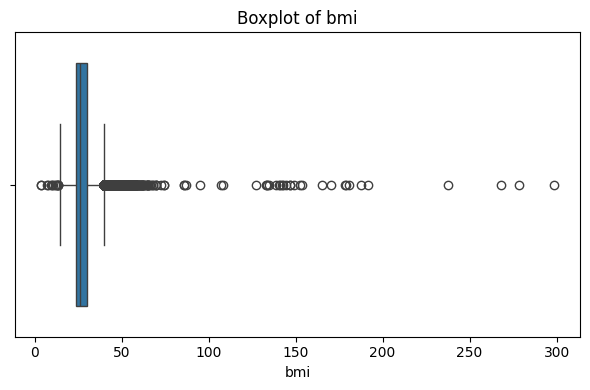

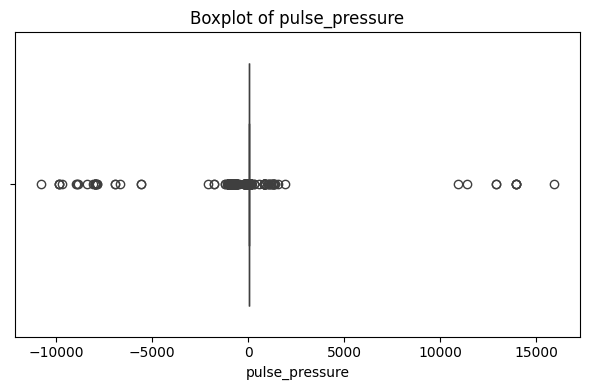

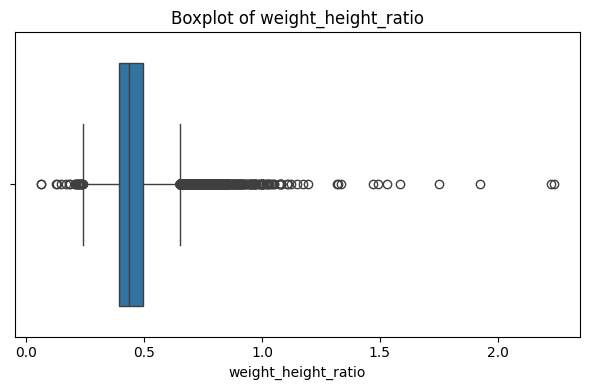

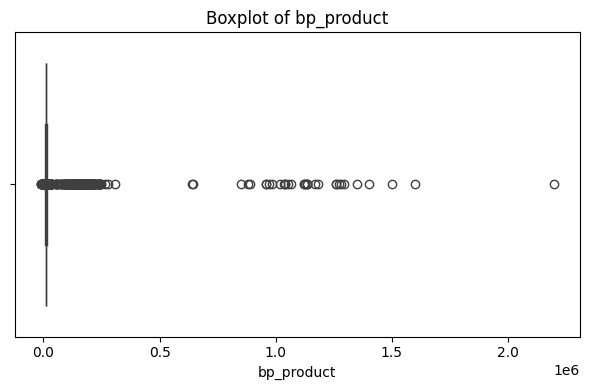

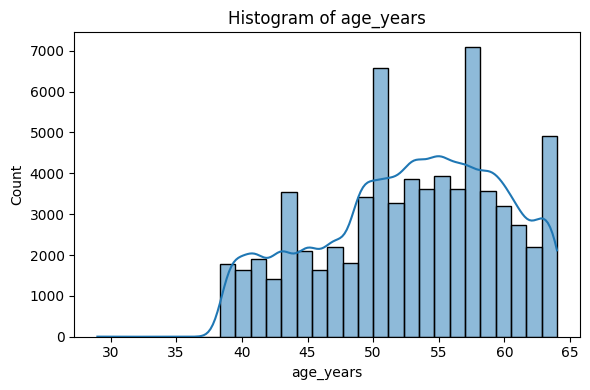

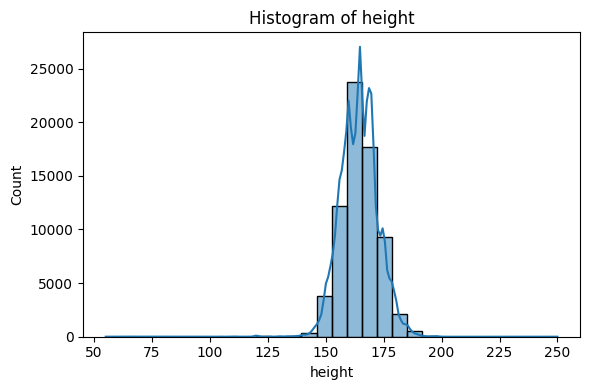

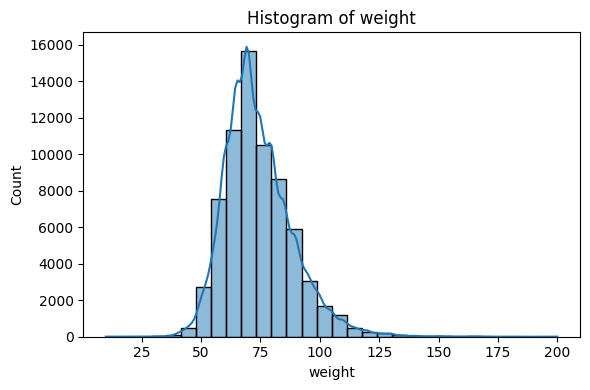

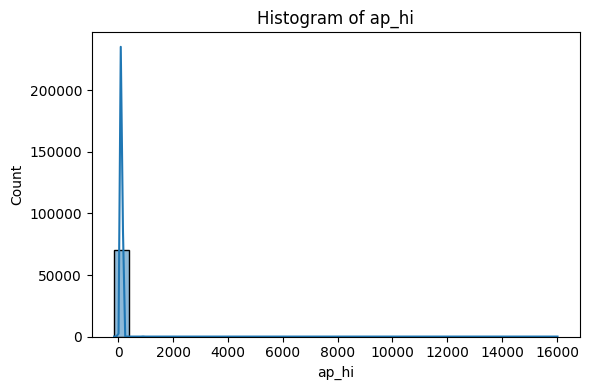

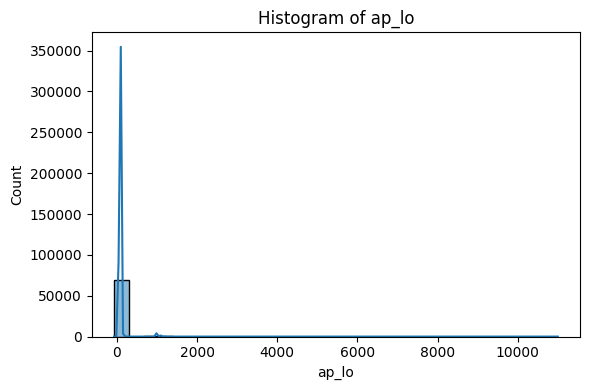

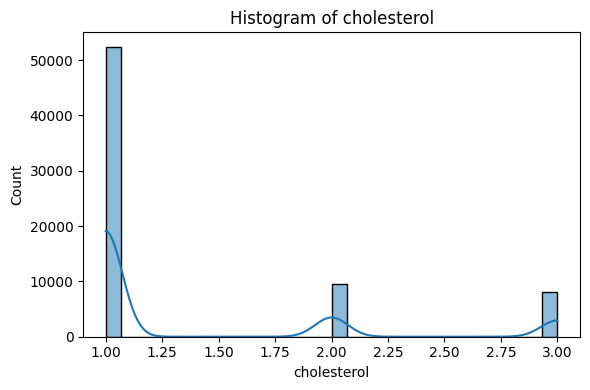

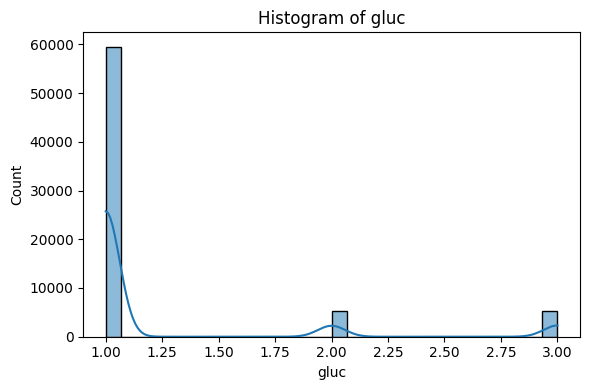

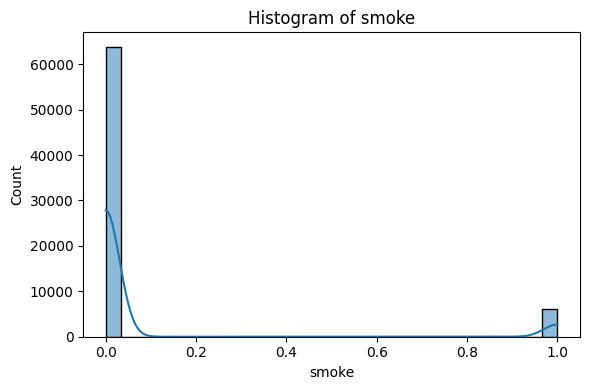

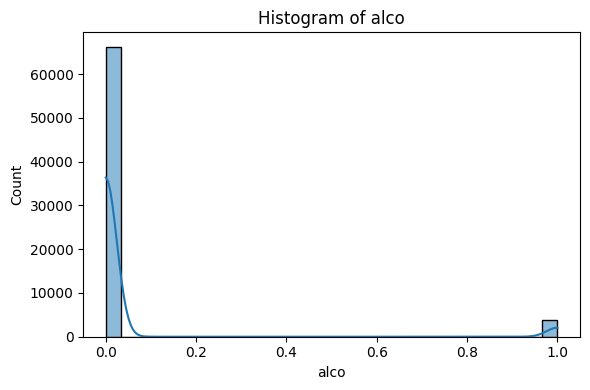

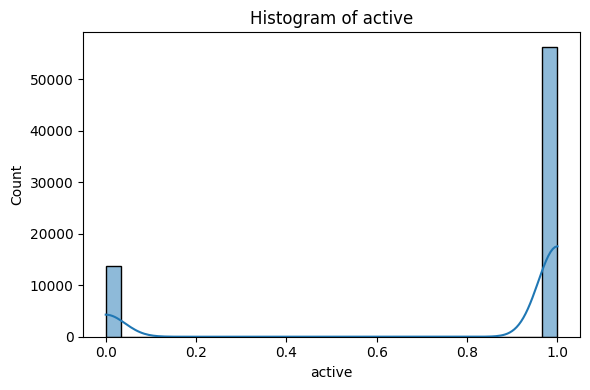

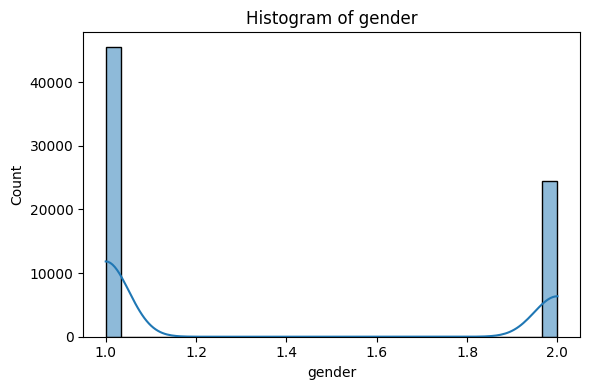

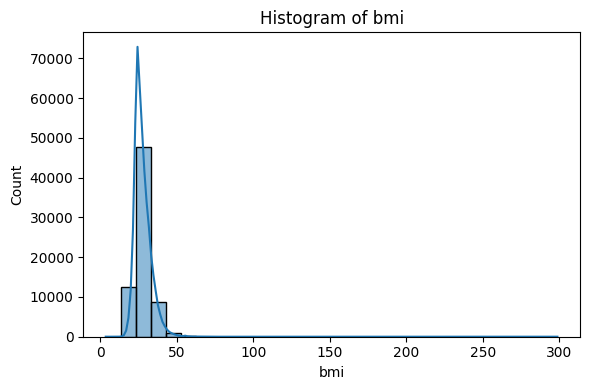

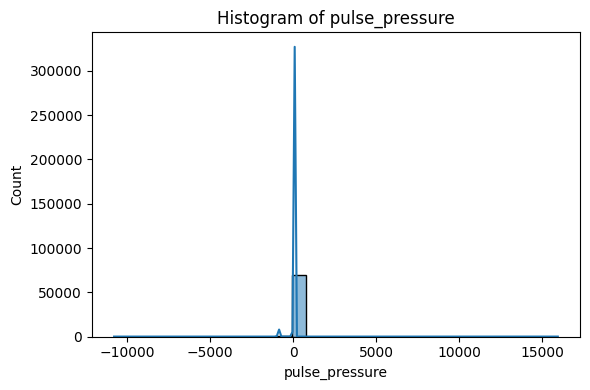

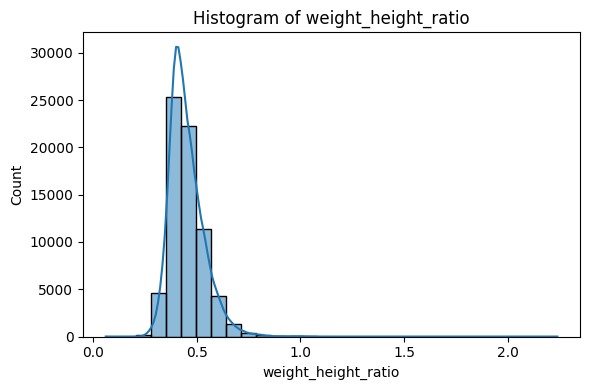

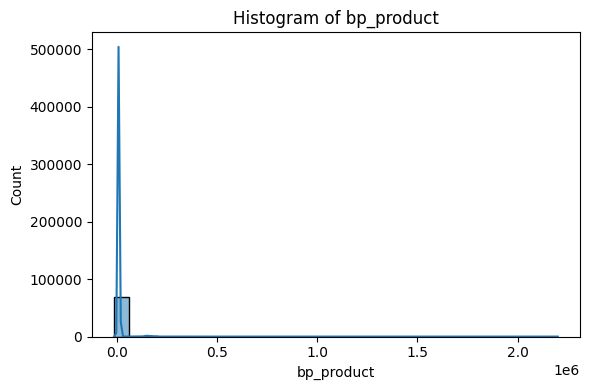

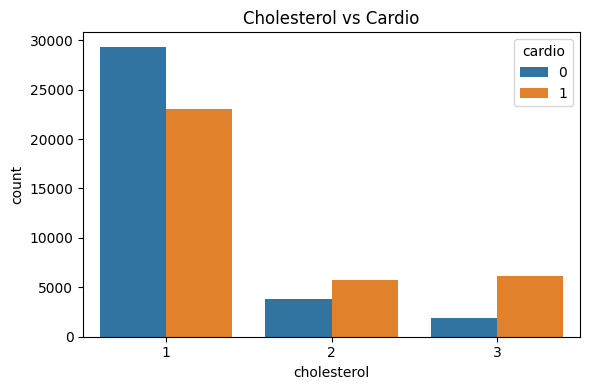

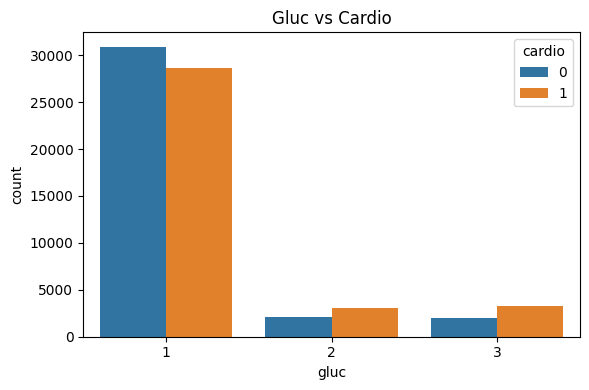

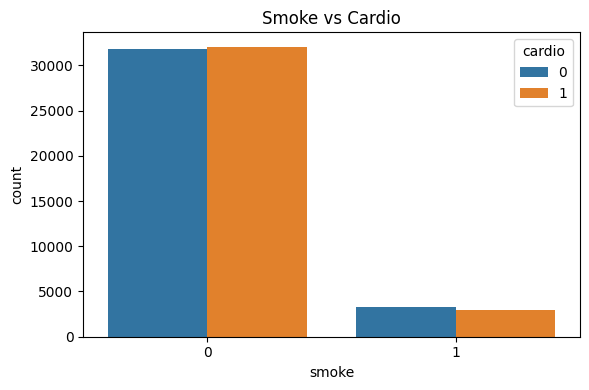

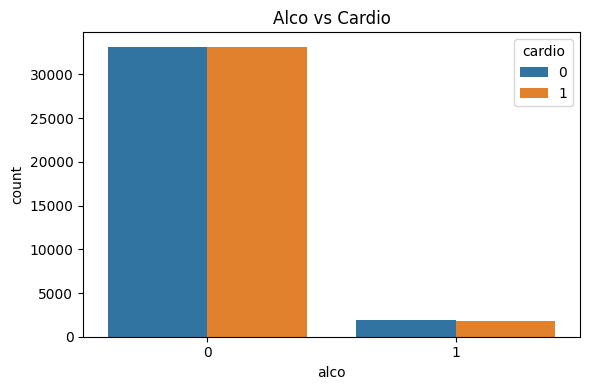

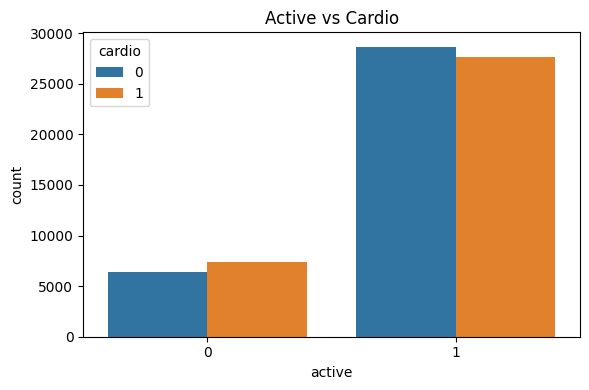

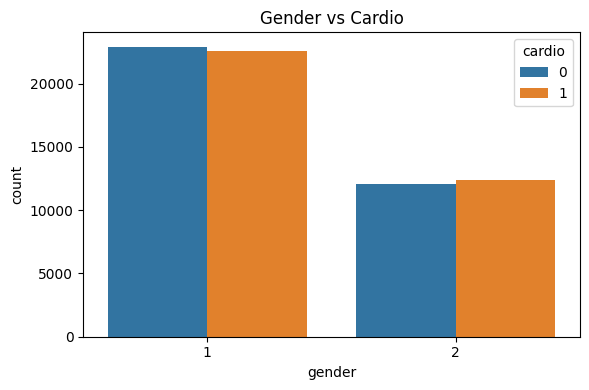

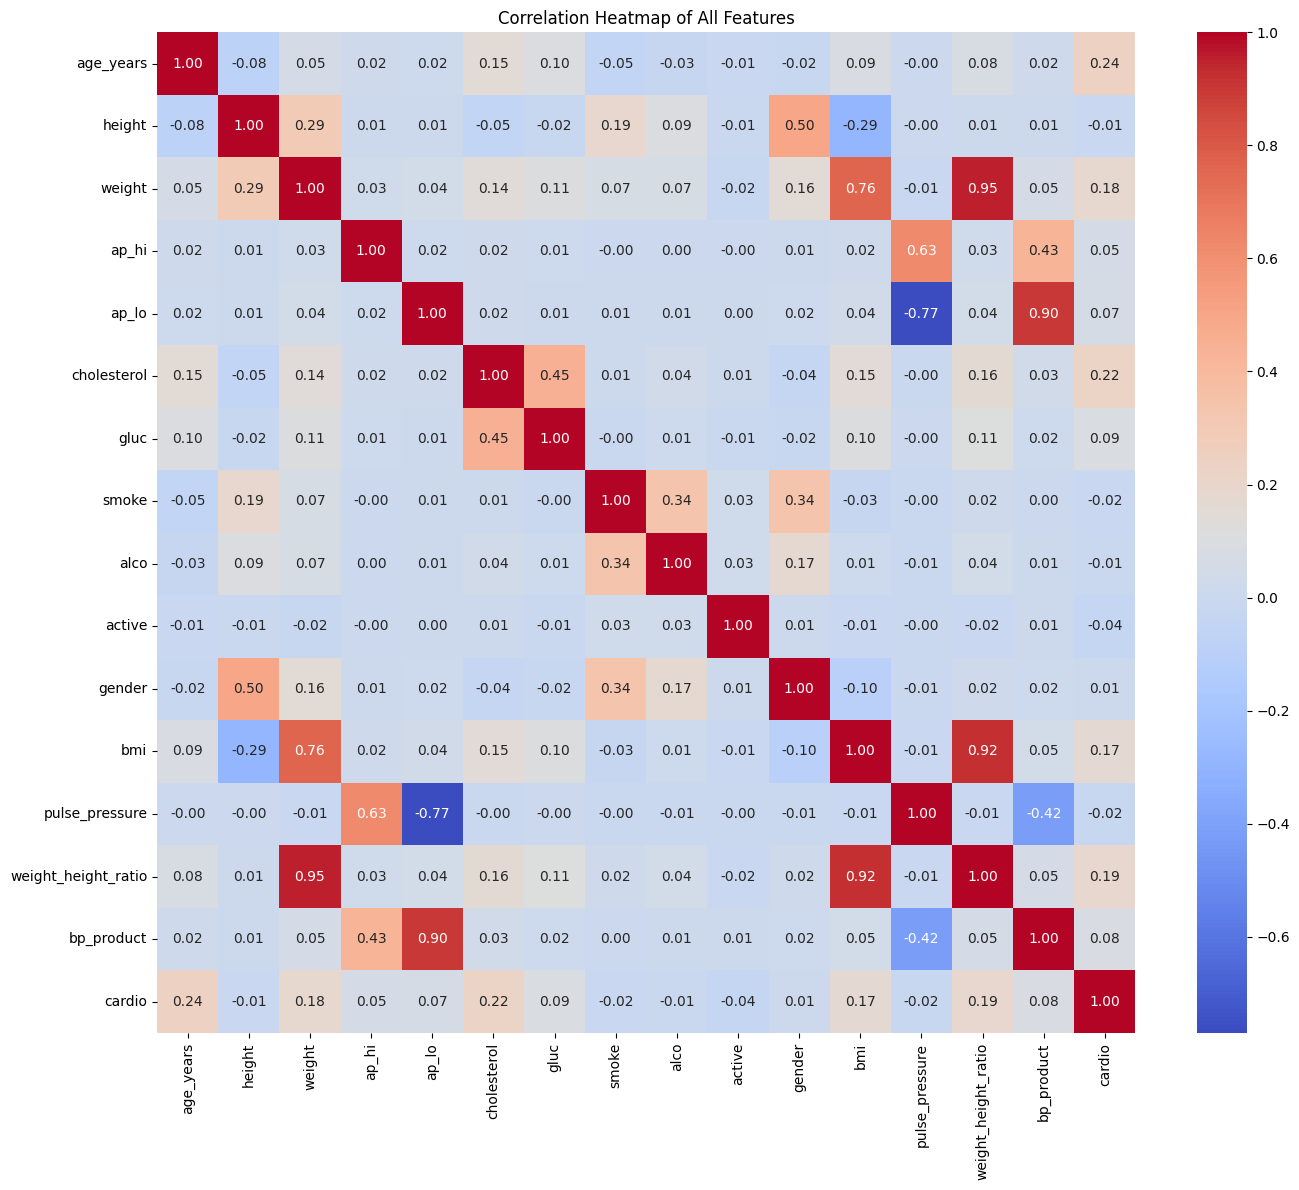

Accuracy Score: 0.712

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

Confusion Matrix:
 [[5034 1954]
 [2078 4934]]

Predictions saved to: /content/prediction_results_labeled.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

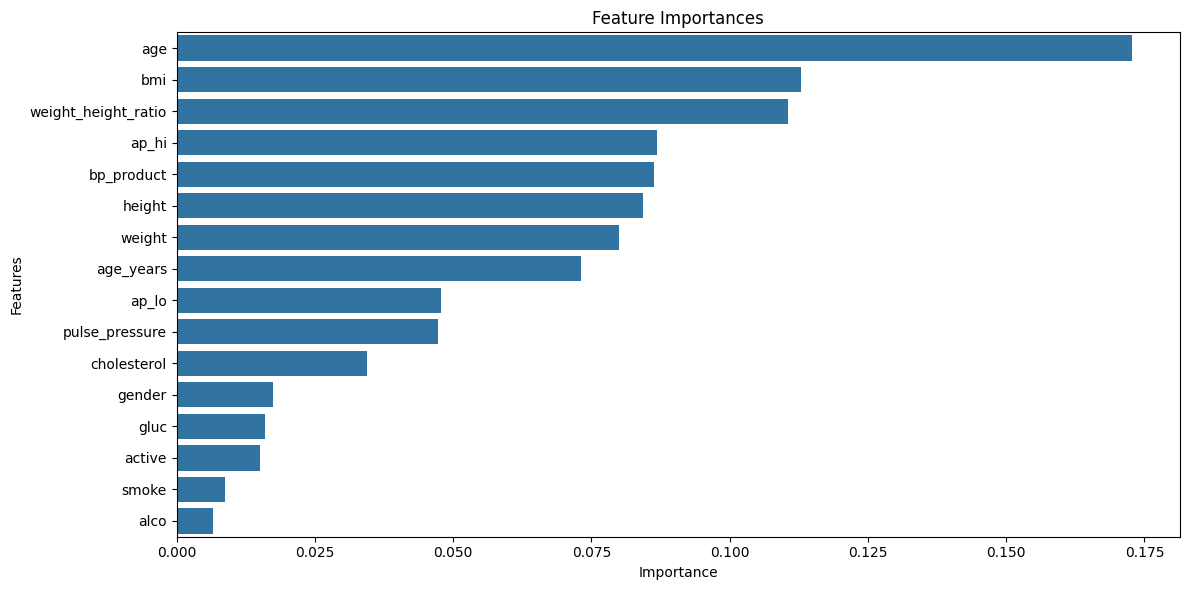

In [3]:
# -----------------------------------------
# PHASE 1: Import Required Libraries
# -----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -----------------------------------------
# PHASE 2: Upload and Load Dataset (Colab)
# -----------------------------------------
from google.colab import files
uploaded = files.upload()

import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=';')  # Corrected delimiter

# -----------------------------------------
# PHASE 3: Data Cleaning and Preprocessing
# -----------------------------------------
# Drop 'id' column if it exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Drop rows with missing target values
df.dropna(subset=['cardio'], inplace=True)

# -----------------------------------------
# PHASE 3.1: Feature Engineering + Add to DF
# -----------------------------------------
df['age_years'] = (df['age'] / 365).astype(int)
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['weight_height_ratio'] = df['weight'] / df['height']
df['bp_product'] = df['ap_hi'] * df['ap_lo']

# -----------------------------------------
# PHASE 3.2: Visualization of All Features
# -----------------------------------------

# All features to visualize
all_features = [
    'age_years', 'height', 'weight', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active',
    'gender', 'bmi', 'pulse_pressure', 'weight_height_ratio', 'bp_product'
]

# Boxplots for all numerical features
for col in all_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Histograms for all numerical features
for col in all_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

# Countplots for categorical vs cardio (target)
categorical_cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, hue='cardio')
    plt.title(f'{col.capitalize()} vs Cardio')
    plt.tight_layout()
    plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 12))
corr_matrix = df[all_features + ['cardio']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap of All Features")
plt.tight_layout()
plt.show()

# -----------------------------------------
# PHASE 4: Define Features and Target
# -----------------------------------------
X = df.drop('cardio', axis=1)
y = df['cardio']

# -----------------------------------------
# PHASE 5: Train-Test Split
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# -----------------------------------------
# PHASE 6: Feature Scaling
# -----------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------
# PHASE 7: Model Training
# -----------------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# -----------------------------------------
# PHASE 8: Predictions
# -----------------------------------------
y_pred = model.predict(X_test_scaled)

# -----------------------------------------
# PHASE 9: Model Evaluation
# -----------------------------------------
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------------------
# PHASE 10: Save Predictions with Labels
# -----------------------------------------
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred

label_map = {0: "Low Risk", 1: "High Risk"}
results['Actual Label'] = results['Actual'].map(label_map)
results['Predicted Label'] = results['Predicted'].map(label_map)

results_to_save = results.drop(columns=['Actual', 'Predicted'])

# Save to CSV
output_path = '/content/prediction_results_labeled.csv'
results_to_save.to_csv(output_path, index=False)
print(f"\nPredictions saved to: {output_path}")

# Download in Colab
files.download(output_path)

# -----------------------------------------
# PHASE 11: Feature Importance Plot
# -----------------------------------------
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
